In [1]:
import numpy as np
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#config notebook
%config InlineBackend.figure_format ='retina'
pd.set_option("display.max_rows", None, "display.max_columns", None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def load_data_csv(path):
  dataframe = pd.read_csv(path)
  return dataframe
df  = load_data_csv('https://raw.githubusercontent.com/anuwatavis/dataset/master/BIG%20MART%20SALES%20PREDICTION/Train.csv')

In [3]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'low fat', 'Regular', 'reg'], ['LF', 'LF', 'REG', 'REG'])

In [4]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [5]:
avg =df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=avg, inplace=True)

In [6]:
df['Outlet_Size'].fillna(value = 'Medium', inplace =True)

In [7]:
df =df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [8]:
df_real = pd.get_dummies(df, drop_first=True)

In [9]:
from sklearn.preprocessing  import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [10]:
X =df_real.drop(['Item_Outlet_Sales'], axis =1 )
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1, 1)

In [11]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# 54.  สร้างโมเดลแบบ Decision Tree Regression โดยใช้ทุก features


In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
dt_regressor = DecisionTreeRegressor()

In [16]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [17]:
predicted =  sc_y.inverse_transform(dt_regressor.predict(X_test))
predicted

array([ 322.2472,  703.0848,  503.3448, ..., 1006.6896,  377.5086,
       2542.0244])

# 55. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2


In [18]:
from sklearn import metrics

In [20]:
y_real = sc_y.inverse_transform(y_test)

In [21]:
MAE = metrics.mean_absolute_error(y_real, predicted)
MSE = metrics.mean_squared_error(y_real, predicted)
RMSE = np.sqrt(metrics.mean_squared_error(y_real, predicted))
R2 = metrics.r2_score(y_real, predicted)
print('MAE', MAE)
print('MSE', MSE)
print('RMSE', RMSE)
print('R2', R2 )

MAE 1020.5181944086021
MSE 2208185.762749144
RMSE 1485.9965554297708
R2 0.18756067630360196


# 56. สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results


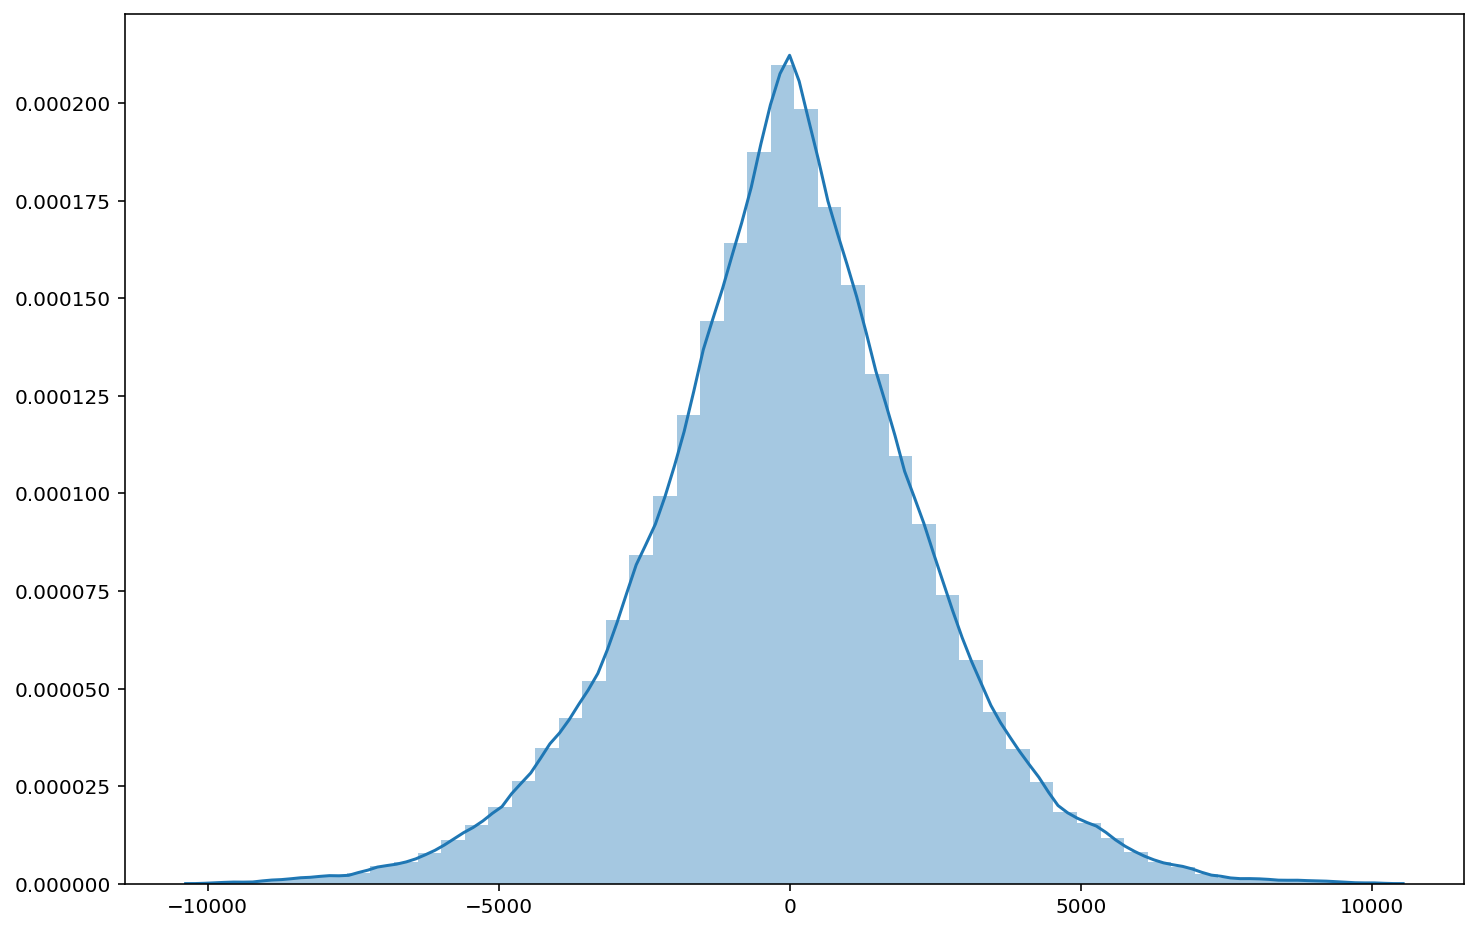

In [26]:
#normal distribution checking 
fig = plt.figure(figsize=(12,8))
sns.distplot(y_real-predicted, bins=50)

# 57. สร้าง dataframe เปรียบเทียบ ยอดขายจริงกับการทำนาย


In [28]:
dict_compare = {'Sales' : y_real.flatten(), 'Predicted' : predicted.flatten()}
df_predicted = pd.DataFrame(dict_compare)
df_predicted.head()

,Sales,Predicted
0,1743.0644,322.2472
1,356.8688,703.0848
2,377.5086,503.3448
3,5778.4782,5000.8238
4,2356.9320,796.2968


# 58. หา Correlation จาก dataframe ข้อ 57


In [29]:
df_predicted.corr()

,Sales,Predicted
Sales,1.00000,0.60925
Predicted,0.60925,1.00000
